# Aulas Módulo 5

# Aula 1

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
import re
from sklearn.metrics import plot_confusion_matrix, accuracy_score,classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [2]:
warnings.filterwarnings('ignore')

## Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categóricos, mas utilizando outro método.

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/PedroHCAlmeida/Bootcamp_alura/main/Modulo_5/dados/dados.csv') 
dados = dados.drop(columns='WINDOW')

In [4]:
dados

,AGE_ABOVE65,AGE_PERCENTIL,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,10th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,40th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,10th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,0,10th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,40th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
348,1,Above 90th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0
349,0,50th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
350,0,40th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


In [5]:
le = LabelEncoder()
dados.AGE_PERCENTIL = le.fit_transform(dados.AGE_PERCENTIL)
dados.AGE_PERCENTIL

0      5
1      0
2      3
3      0
4      0
      ..
347    3
348    9
349    4
350    3
351    4
Name: AGE_PERCENTIL, Length: 352, dtype: int32

In [6]:
dados.describe()

,AGE_ABOVE65,AGE_PERCENTIL,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,0.457386,4.278409,0.105114,0.022727,0.090909,0.019886,0.127841,0.042614,0.193182,0.161932,...,-0.972594,-0.970915,-0.986169,-0.970149,-0.971016,-0.982000,-0.973435,-0.971301,-0.986184,0.463068
std,0.498890,2.886611,0.307136,0.149245,0.287889,0.139809,0.334388,0.202272,0.395356,0.368913,...,0.087102,0.081659,0.033305,0.090259,0.083091,0.052097,0.077046,0.080018,0.033720,0.499344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
max,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.058824,-0.238095,-0.757576,-0.217391,-0.351328,-0.535878,-0.451613,-0.285468,-0.732438,1.000000


# Aula 2

# Desafio 02: Verificar o impacto da mudança nos resultados.

## Modelo sem o AGE_PERCENTIL

In [7]:
x = dados.drop(columns=['ICU', 'AGE_PERCENTIL'])
y = dados['ICU']

In [8]:
np.random.seed(748596)
X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y)

In [9]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.5795454545454546

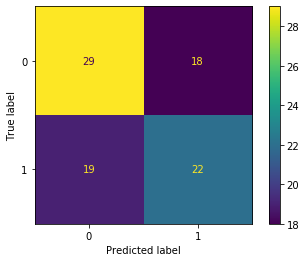

In [10]:
plot_confusion_matrix(dt,X_test,y_test)

In [11]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        48
           1       0.54      0.55      0.54        40

    accuracy                           0.58        88
   macro avg       0.58      0.58      0.58        88
weighted avg       0.58      0.58      0.58        88



## Modelo com o AGE_PERCENTIL

In [12]:
x = dados.drop(columns=['ICU'])
y = dados['ICU']

In [13]:
np.random.seed(748596)
X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y)

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.6363636363636364

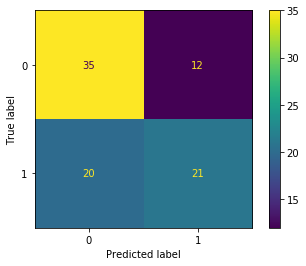

In [15]:
plot_confusion_matrix(dt,X_test,y_test)

In [16]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69        55
           1       0.51      0.64      0.57        33

    accuracy                           0.64        88
   macro avg       0.63      0.64      0.63        88
weighted avg       0.66      0.64      0.64        88



In [17]:
importance = pd.DataFrame({'columns':x.columns, 'importance':dt.feature_importances_})
importance.sort_values('importance', ascending=False)

,columns,importance
127,PCR_MEAN,0.139631
1,AGE_PERCENTIL,0.119504
52,CREATININ_MEAN,0.063695
205,HEART_RATE_MIN,0.059816
53,CREATININ_MIN,0.053374
...,...,...
82,INR_MEAN,0.000000
83,INR_MIN,0.000000
84,INR_MAX,0.000000
85,INR_DIFF,0.000000


## Desafio 03: Pesquisar sobre F-score. 

F_score são métricas capazes de resumir em apenas um número a precisão e o recall de uma classificação, o intuito é conseguir avaliar e saber qual modelo é melhor com apenas uma métrica que generalize a acertividade do modelo em relação aos valores totais verdadeiros e aos valores totais preditos, pois muitas vezes olhar para precisão e para o recall separados não ajuda a escolher qual modelo é melhor, uma vez que um pode ter uma precisão melhor e o outro um recall melhor.

A fórmula dessa métrica depende de um parâmetro beta, quando esse parâmetro é igual a 1 a métrica é chamada f1-score, quando é igual a 2 é chamada de f2-score e assim sucessivamente, essa fórmula é:

![formula_f_score](https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff)

In [18]:
def f_score(precision,recall,beta):
    return (1 + (beta**2))*precision*recall/((beta**2*precision)+recall)

## F1-score

precisão = 0.5 <br>
recall = 1

In [19]:
f_score(0.5,1,1)

0.6666666666666666

precisão = 1 <br>
recall = 0.5

In [20]:
f_score(1,0.5,1)

0.6666666666666666

## F-2 Score

precisão = 0.5 <br>
recall = 1

In [21]:
f_score(0.5,1,2)

0.8333333333333334

In [22]:
f_score(1,0.5,2)

0.5555555555555556

precisão = 1 <br>
recall = 0.5

Como é possível perceber nos testes, quando usamos o f1-score as duas métricas de recall e precisão tem o mesmo peso, ao aumentarmos o beta um recall mais baixo impacta mais no resultado do que a precisão, ou seja, usar valores de beta maiores pode ser interessante se o recall for mais importante no problema do contexto

(https://deepai.org/machine-learning-glossary-and-terms/f-score)<br>
(https://en.wikipedia.org/wiki/F-score)

## Desafio 04: Pesquisar e plotar a arvore de decisão criada pelo modelo.

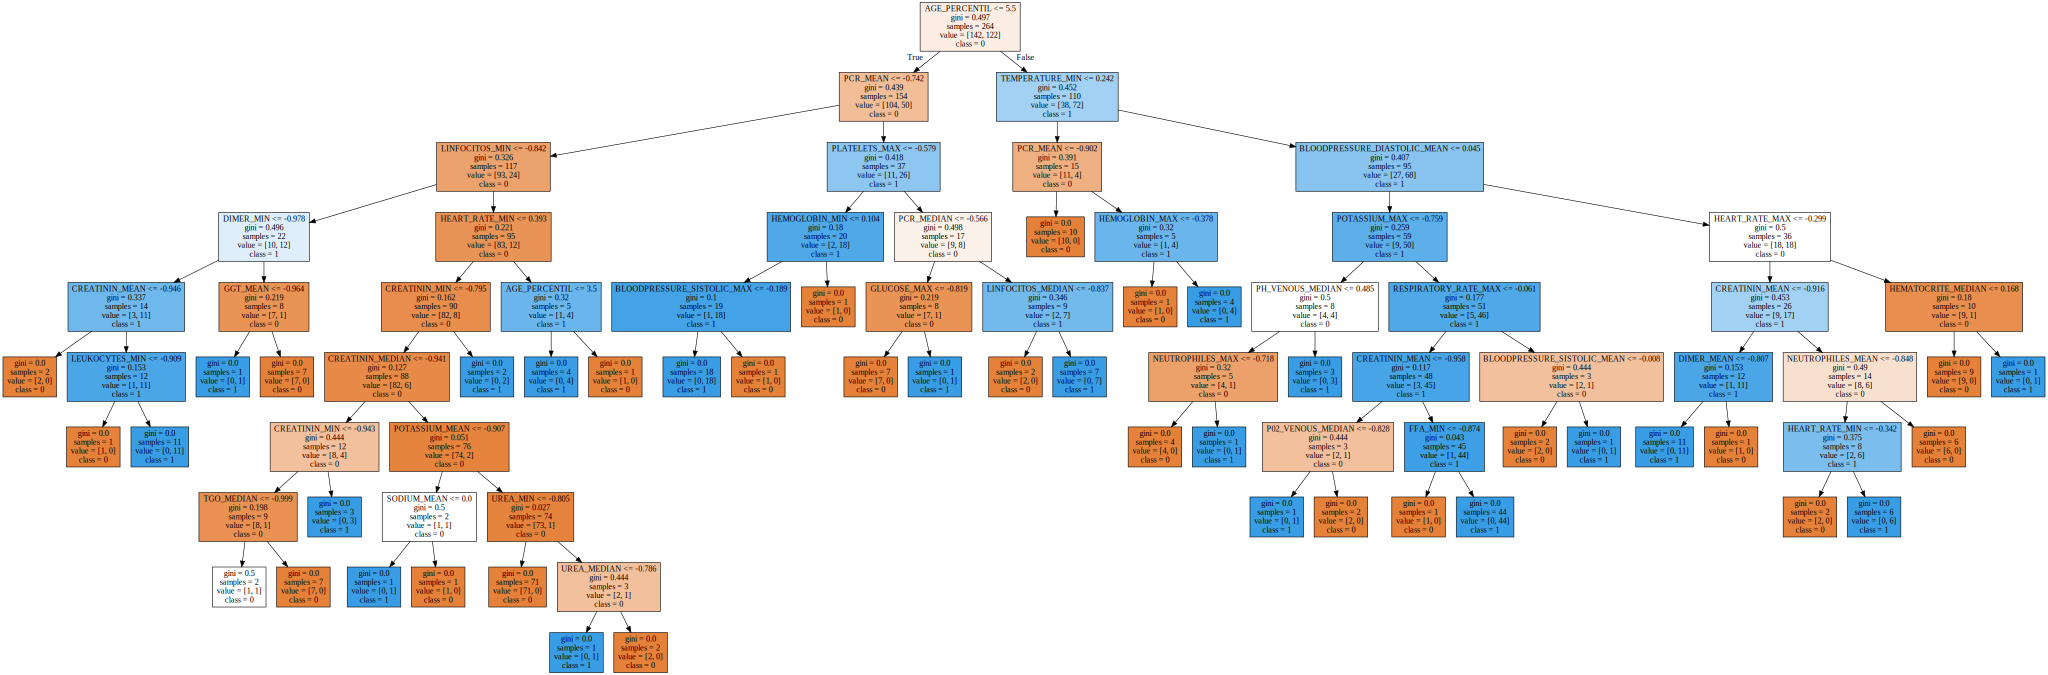

In [23]:
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=x.columns,
                           class_names=['0','1'],
                           filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

## Desafio 05: Criar uma função que gere a curva ROC.

In [233]:
class Modelo:
    def __init__(self, Modelo, dados, n_roda=1, **kwargs):
        x = dados.drop(columns='ICU')
        y = dados['ICU']
        
        auc_list = []
        tprs = []
        self.fprs_mean = np.linspace(0, 1, 100)
        for i in range(n_roda):
            
            X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y)
            self.modelo = Modelo(**kwargs)
            self.modelo.fit(X_train, y_train)
            predict = self.modelo.predict(X_test)
            pred_proba = self.modelo.predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_test, pred_proba[:,1])

            interp_tpr = np.interp(self.fprs_mean, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            auc_list.append(roc_auc_score(y_test, pred_proba[:,1]))
        
        self.tprs_mean = np.mean(tprs, axis=0)
        self.tprs_std = np.std(tprs, axis=0)
        self.auc_mean = np.mean(auc_list)
        self.auc_std = np.std(auc_list)
        
    def plota_roc_curve(self, ax, color):
        
        name = self.modelo
        
        sns.lineplot(self.fprs_mean, self.tprs_mean, ax=ax, label= r'ROC CURVE (AUC MEAN = %0.2f $\pm$ %0.2f)' % (self.auc_mean, 2*self.auc_std) + f'{name}', 
                     color=color, estimator=None)
        
        plt.sca(ax)
        tprs_upper = np.minimum(self.tprs_mean + self.tprs_std, 1)
        tprs_lower = np.maximum(self.tprs_mean - self.tprs_std, 0)
        plt.fill_between(self.fprs_mean, tprs_lower, tprs_upper, color=color, alpha=.05)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate', fontsize=15)
        plt.ylabel('True Positive Rate', fontsize=15)
        plt.legend(loc='lower right', fontsize=12)
        plt.title('ROC CURVE', fontsize=25)
        return ax

In [234]:
dt = Modelo(DecisionTreeClassifier,dados, n_roda=50)

In [235]:
log = Modelo(LogisticRegression,dados,  n_roda=50)

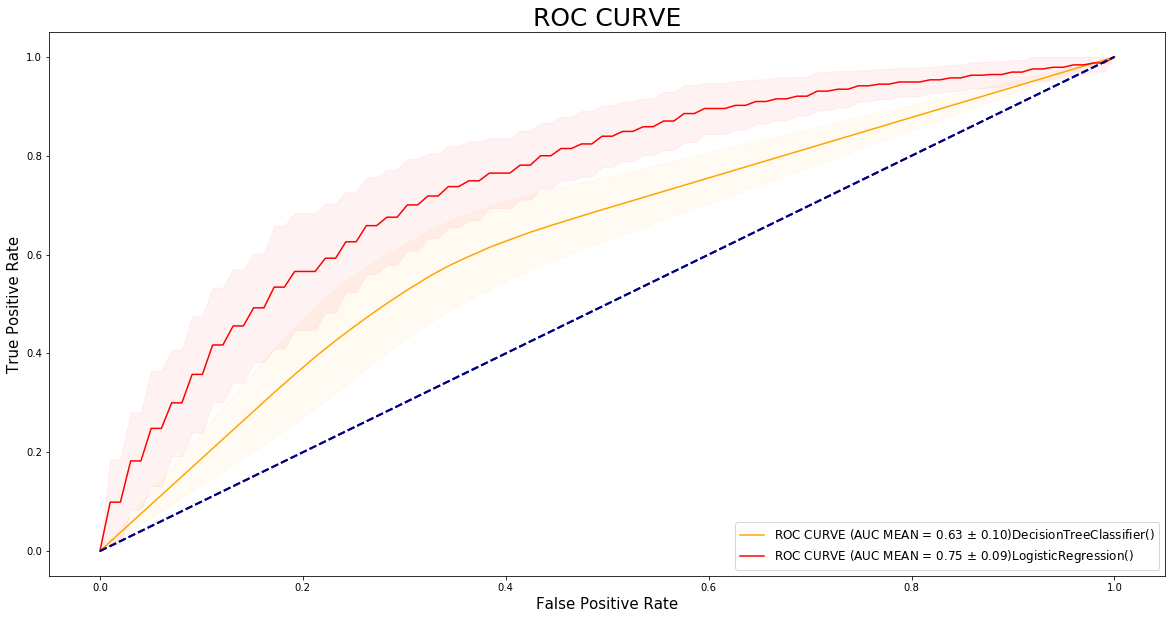

In [236]:
fig, ax = plt.subplots(figsize=(20,10))
dt.plota_roc_curve(ax, 'orange')
log.plota_roc_curve(ax, 'red')
plt.show()

## Desafio 06: Pensar e tentar diminuir o efeito de aleatoriedade nas previsões.

O efeito da aleatoridade pode ser diminuído se usarmos uma validação cruzada para estabelecer as métricas do modelo, e dessa forma utilizar todos os dados para treino e todos para teste e fazer diversos treinamentos e testes para gerar uma média das métricas mais consistentes que cosigam generalizá-las para diferentes conjuntos de treino e teste.

# Aula 3

## Desafio 07: Estudar a documentação do sklearn e testar outros modelos.

![](https://scikit-learn.org/stable/_static/ml_map.png)

In [223]:
from sklearn.svm import SVC

In [238]:
svc_linear = Modelo(SVC, dados, probability=True, n_roda=50, kernel='linear')

In [239]:
svc_quadrado = Modelo(SVC, dados, probability=True, n_roda=50, kernel='poly', degree=2)

In [241]:
svc_cubico = Modelo(SVC, dados, probability=True, n_roda=50, kernel='poly', degree=3)

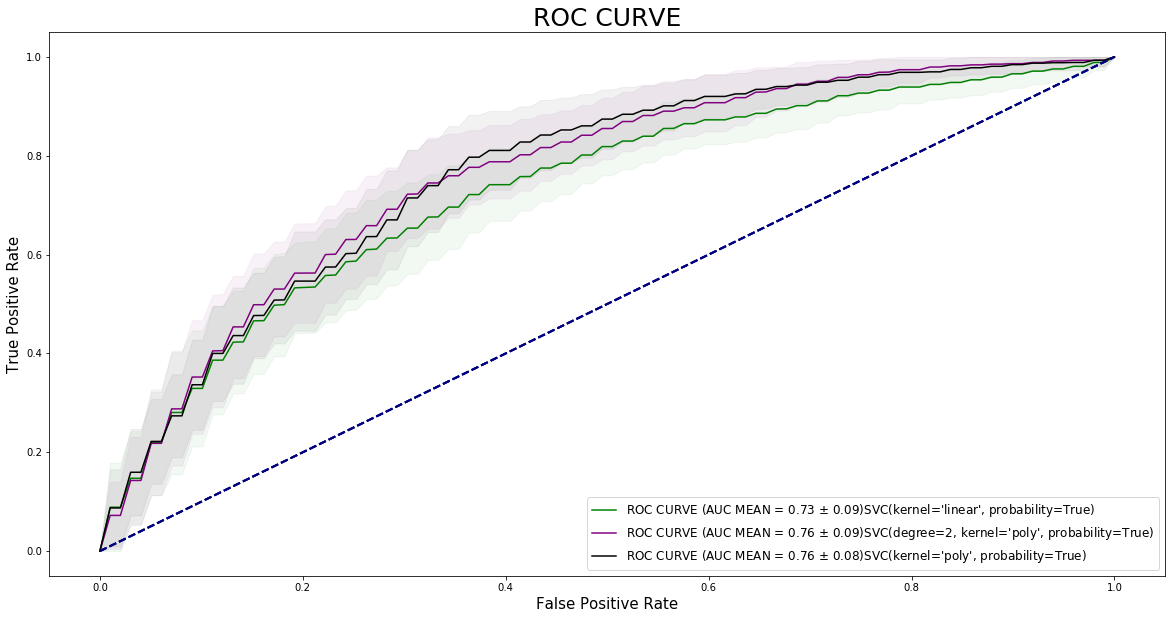

In [243]:
fig, ax = plt.subplots(figsize=(20,10))
svc_linear.plota_roc_curve(ax, 'green')
svc_quadrado.plota_roc_curve(ax, 'purple')
svc_cubico.plota_roc_curve(ax, 'black')
plt.show()